In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

C:\Users\indir\AppData\Local\Temp\ipykernel_32260\3315849315.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [273]:
coursera_APAC=pd.read_excel(r"C:\Users\indir\Downloads\APAC coursera.xlsx",header=1)
    


In [45]:
coursera_APAC.head()

,Week COunt,C4B,C4C,C4G,Grand Total,C4B First Differences
0,1,80000.0,52500.00,NaN,132500.00,NaN
1,2,275152.0,1.00,75000.0,350153.00,195152.0
2,3,817831.0,451250.00,71273.0,1340354.00,542679.0
3,4,714100.0,692489.51,NaN,1406589.51,-103731.0
4,5,391002.0,227002.00,NaN,618004.00,-323098.0


In [46]:
Coursera_C4B= coursera_APAC[['Week COunt', 'C4B']]

In [47]:
Coursera_C4B

,Week COunt,C4B
0,1,80000.00
1,2,275152.00
2,3,817831.00
3,4,714100.00
4,5,391002.00
5,6,315900.00
6,7,580629.00
7,8,645000.00
8,9,818234.00
9,10,724250.00


In [49]:
Coursera_C4B['Date'] = pd.date_range(start='2024-01-01', periods=len(Coursera_C4B), freq='W')
Coursera_C4B.set_index('Date', inplace=True)

C:\Users\indir\AppData\Local\Temp\ipykernel_32260\3276958804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coursera_C4B['Date'] = pd.date_range(start='2024-01-01', periods=len(Coursera_C4B), freq='W')


In [50]:
Coursera_C4B

,Week COunt,C4B
Date,,
2024-01-07,1,80000.00
2024-01-14,2,275152.00
2024-01-21,3,817831.00
2024-01-28,4,714100.00
2024-02-04,5,391002.00
2024-02-11,6,315900.00
2024-02-18,7,580629.00
2024-02-25,8,645000.00
2024-03-03,9,818234.00


Text(0, 0.5, 'Sales')

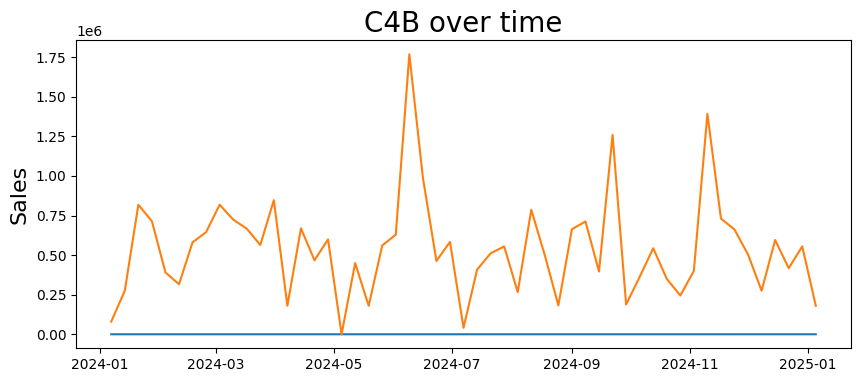

In [54]:
plt.figure(figsize=(10,4))
plt.plot(Coursera_C4B)
plt.title('C4B over time', fontsize=20)
plt.ylabel('Sales', fontsize=16)

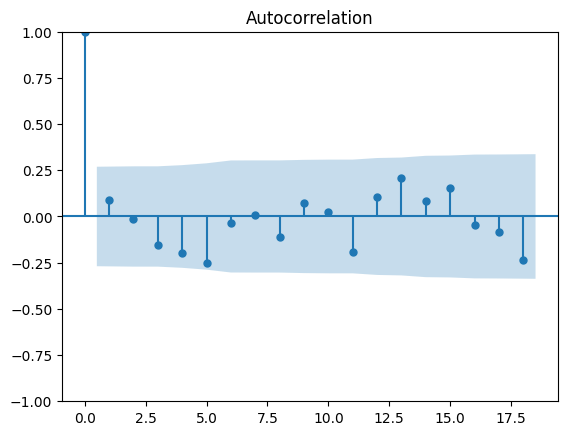

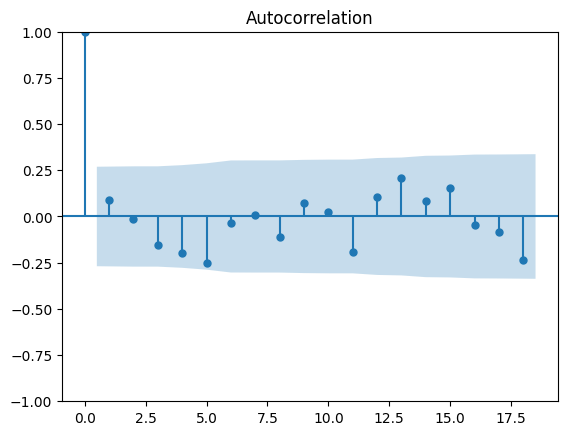

In [57]:
plot_acf(Coursera_C4B['C4B']) 

C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


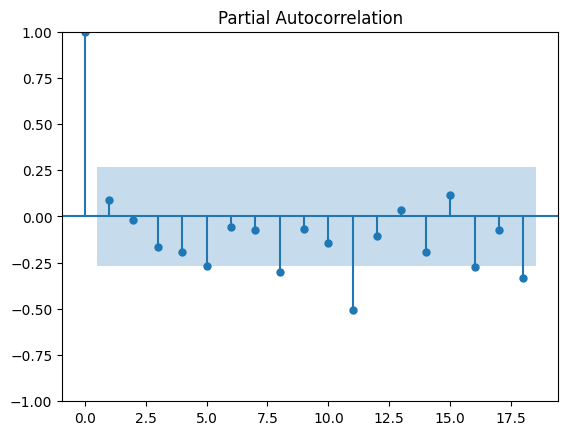

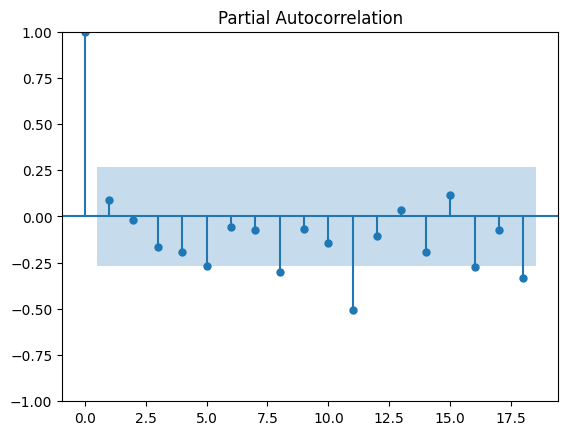

In [59]:
plot_pacf(Coursera_C4B['C4B']) 

In [61]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Coursera_C4B['C4B'])

In [62]:
result

(-4.479191681776013,
 0.00021438317912288141,
 10,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 1164.3320167937586)

Data is stationary 

We first check AR(1,0,1) Model

In [64]:
train_size = int(len(Coursera_C4B['C4B']) * 0.8)
train, test = Coursera_C4B['C4B'][:train_size], Coursera_C4B['C4B'][train_size:]

In [66]:
model=ARIMA(train,order=(1,0,1))
model_fit=model.fit()

C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [67]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    C4B   No. Observations:                   42
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -591.918
Date:                Wed, 04 Jun 2025   AIC                           1191.836
Time:                        11:36:55   BIC                           1198.787
Sample:                    01-07-2024   HQIC                          1194.384
                         - 10-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.405e+05   5.59e+04      9.667      0.000    4.31e+05     6.5e+05
ar.L1          0.1024      3.350      0.031      0.976      -6.464       6.669
ma.L1         -0.0193      3.344     -0.006      0.9

since this model is leading to insignificant results, we try ARIMA(1,0,0), ARIMA(1,0,1)

In [99]:
model1=ARIMA(train,order=(5,1,0))
model_fit1=model1.fit()

C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [100]:
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                    C4B   No. Observations:                   42
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -579.986
Date:                Wed, 04 Jun 2025   AIC                           1171.972
Time:                        11:42:09   BIC                           1182.254
Sample:                    01-07-2024   HQIC                          1175.716
                         - 10-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6370      0.181     -3.511      0.000      -0.992      -0.281
ar.L2         -0.3567      0.179     -1.997      0.046      -0.707      -0.007
ar.L3         -0.3061      0.249     -1.229      0.2

In [101]:
#ARIMA(5,1,0) looks better as it gives many significant outcomes--> we will choose this but will check other models in case we can get something better

In [126]:
model2=ARIMA(train,order=(5,2,0))
model_fit2=model2.fit()

C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [127]:
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:                    C4B   No. Observations:                   42
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -573.726
Date:                Wed, 04 Jun 2025   AIC                           1159.451
Time:                        14:18:31   BIC                           1169.585
Sample:                    01-07-2024   HQIC                          1163.115
                         - 10-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1789      0.193     -6.105      0.000      -1.557      -0.800
ar.L2         -0.9849      0.305     -3.233      0.001      -1.582      -0.388
ar.L3         -0.7282      0.237     -3.076      0.0

In [204]:
model3=ARIMA(train,order=(6,2,1))
model_fit3=model3.fit()

C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [205]:
print(model_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:                    C4B   No. Observations:                   42
Model:                 ARIMA(6, 2, 1)   Log Likelihood                -569.160
Date:                Wed, 04 Jun 2025   AIC                           1154.319
Time:                        16:13:05   BIC                           1167.830
Sample:                    01-07-2024   HQIC                          1159.204
                         - 10-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6268      0.441     -1.420      0.156      -1.492       0.238
ar.L2         -0.3319      0.358     -0.927      0.354      -1.033       0.370
ar.L3         -0.2584      0.445     -0.580      0.5

In [254]:
# predicting the test set with ARIMA(5,1,0)

In [269]:
modelR=ARIMA(train,order=(5,2,1))
modelR_fit = modelR.fit()
print(modelR_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                    C4B   No. Observations:                   42
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -569.621
Date:                Wed, 04 Jun 2025   AIC                           1153.242
Time:                        16:31:58   BIC                           1165.064
Sample:                    01-07-2024   HQIC                          1157.517
                         - 10-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6352      0.303     -2.094      0.036      -1.230      -0.041
ar.L2         -0.3385      0.305     -1.110      0.267      -0.936       0.259
ar.L3         -0.2619      0.388     -0.675      0.4

C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\indir\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [270]:
n_periods = len(test)
forecast = modelR_fit.forecast(steps=n_periods)

# Convert to pandas Series with same index as test
forecast_series = pd.Series(forecast, index=test.index)


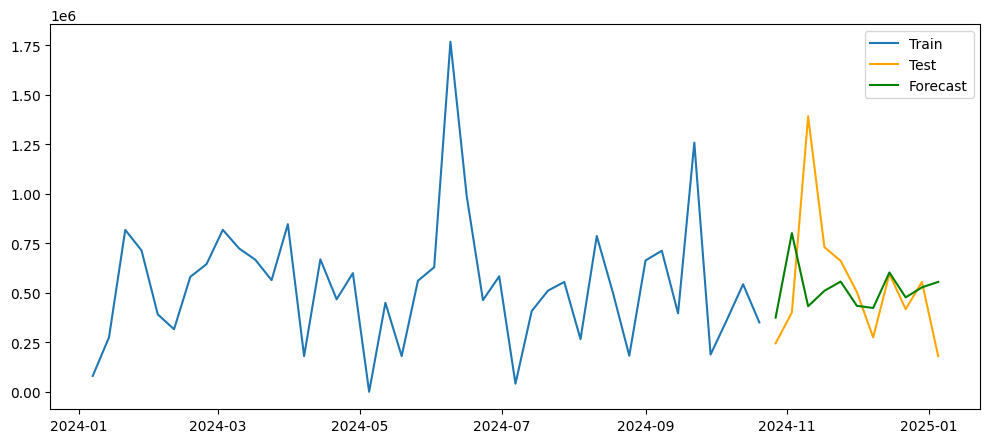

In [271]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast_series, label='Forecast', color='green')
plt.legend()
plt.show()

In [272]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 347820.87
MAE: 227564.41


In [258]:
# Generate forecast with confidence intervals
forecast_result = modelR_fit.get_forecast(steps=len(test))

# Extract mean forecast and confidence intervals
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

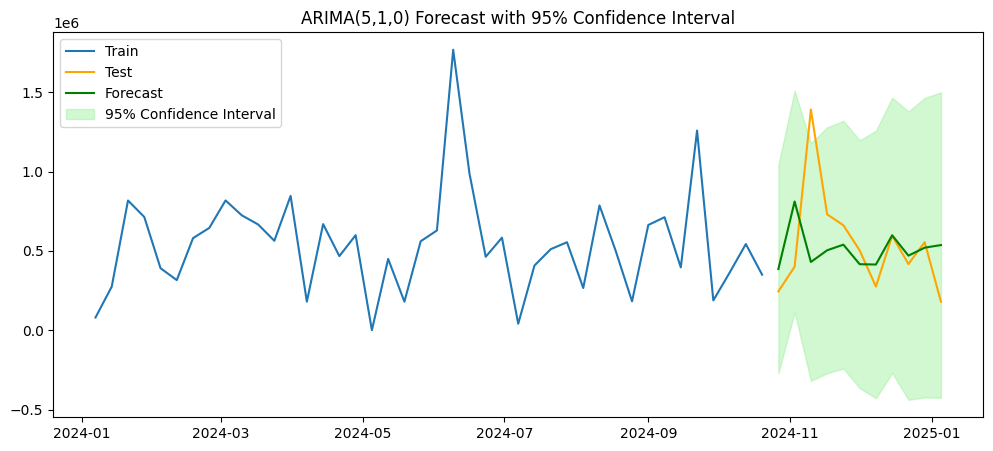

In [259]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training and test data
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')

# Plot forecast
plt.plot(forecast_mean, label='Forecast', color='green')

# Plot confidence intervals
plt.fill_between(test.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.4, label='95% Confidence Interval')

plt.legend()
plt.title("ARIMA(5,1,0) Forecast with 95% Confidence Interval")
plt.show()

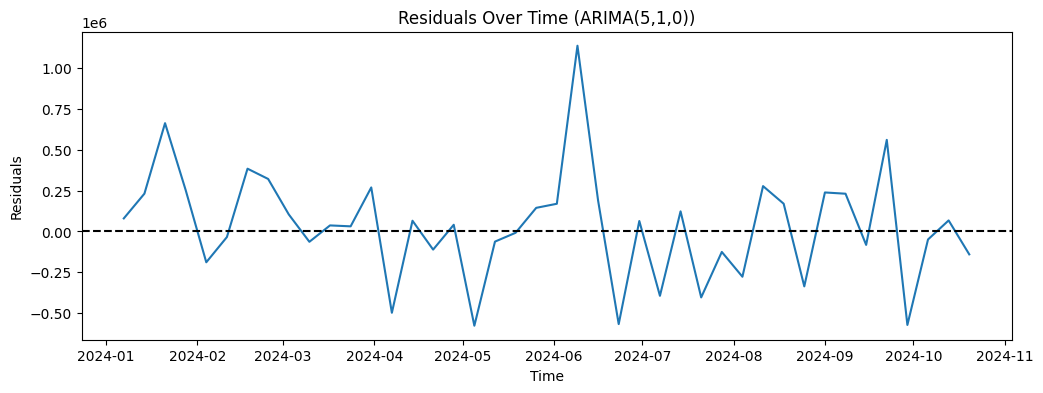

In [261]:
residuals = modelR_fit.resid

# Plot residuals over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals Over Time (ARIMA(5,1,0))")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

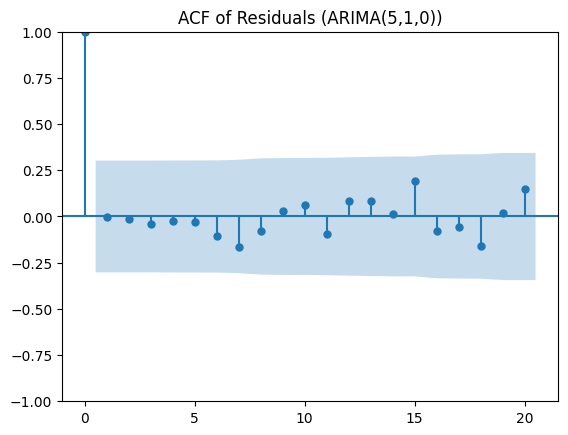

In [262]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals (ARIMA(5,1,0))")
plt.show()

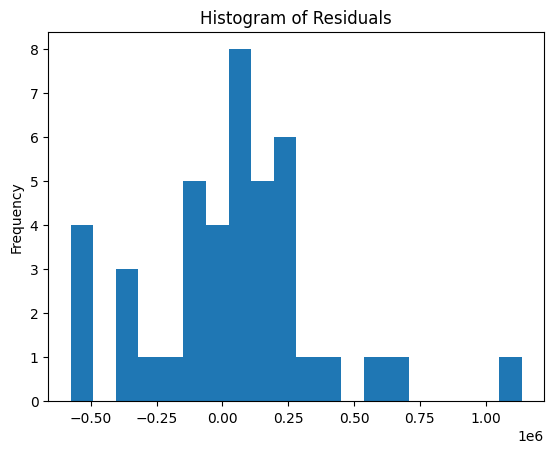

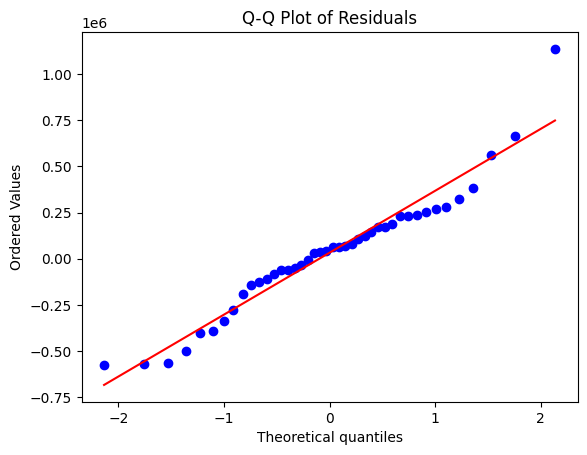

In [263]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram
residuals.plot(kind='hist', bins=20, title="Histogram of Residuals")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [264]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

     lb_stat  lb_pvalue
10  2.741893   0.986863


second differencing gives statistically significant outcomes- however lets now try autoarima to check if there's any other model specification that can be applied

In [128]:
pip install pmdarima


     -------------------------------------- 613.3/613.3 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 10.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [130]:
from pmdarima import auto_arima

# Run auto_arima on the training set
auto_model = auto_arima(train, 
                        start_p=0, start_q=0,
                        max_p=6, max_q=6,
                        d=1,              # Automatically determine differencing
                        seasonal=False,      # Set True if your data is seasonal
                        trace=True,          # Print model exploration process
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

# Print summary
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1184.583, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1176.817, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1172.835, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1182.605, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1174.507, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1171.530, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1173.416, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1177.040, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1177.467, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1168.792, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1167.544, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1168.707, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1174.853, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1170.491, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)

In [132]:
from pmdarima import auto_arima

auto_model = auto_arima(train,
                        start_p=0, start_q=0,
                        max_p=6, max_q=6,
                        max_d=2,
                        seasonal=False,
                        trace=True,
                        stepwise=False,  # ⬅️ disables early cutoff
                        error_action='ignore',
                        suppress_warnings=True)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1242.670, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1230.182, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1226.031, Time=0.01 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1225.481, Time=0.01 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1226.387, Time=0.02 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=1230.604, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1208.223, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1196.973, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1199.272, Time=0.03 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1201.852, Time=0.04 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=1203.828, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1203.617, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1198.494, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1203.450, Time=0.05 sec
 ARIMA(3,0,0)(0